In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer

In [22]:
data= pd.read_csv('E://ineuron//ML//KNN//KNN/nba_2013.csv')
data

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,40,188,0.212766,305,620,0.491935,0.452,209,326,0.641,69,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,135,350,0.385714,252,539,0.467532,0.511,235,285,0.825,29,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,90,292,0.308219,492,991,0.496468,0.489,163,229,0.712,166,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,0,1,0.000000,172,403,0.426799,0.426,146,200,0.730,118,235,353,92,40,41,87,170,490,2013-2014,2013


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [7]:
data.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,481.000000,481.000000,478.000000,479.000000,481.000000,481.000000,461.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,153.268191,314.332640,0.466947,0.480752,91.205821,120.642412,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,147.223161,294.174554,0.104448,0.099552,103.667725,131.240639,0.160166,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,31.000000,67.000000,0.434719,0.451000,16.000000,22.000000,0.654000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,110.000000,227.000000,0.474475,0.488000,53.000000,73.000000,0.751000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,230.000000,459.000000,0.513729,0.526000,126.000000,179.000000,0.821000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,706.000000,1408.000000,1.000000,1.000000,703.000000,805.000000,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [12]:
data.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [17]:
data.columns.values

array(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg',
       'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.',
       'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'pts', 'season', 'season_end'], dtype=object)

In [19]:
data.head(1)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.66,72,144,216,28,23,26,30,122,171,2013-2014,2013


In [23]:
column_to_remove=['player','pos','bref_team_id','season','season_end','pts']
x=data.drop(column_to_remove,axis=1)
y=data.pts

In [24]:
x.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,23,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122
1,20,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203
2,27,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136
4,25,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187


In [25]:
y.head()

0     171
1     265
2     362
3    1330
4     328
Name: pts, dtype: int64

In [31]:
im=SimpleImputer(missing_values=np.nan)
x_new=im.fit_transform(x)
x_new.shape

(481, 25)

In [34]:
data.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [60]:
df=pd.DataFrame(x_new,
             columns=['age','g', 'gs', 'mp', 'fg', 'fga','fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.','efg.','ft','fta', 'ft.','orb','drb','trb','ast','stl','blk','tov','pf'])
print('The shape of x is: ',df.shape)
print('The shape of y is: ',y.shape)
df.head()

The shape of x is:  (481, 25)
The shape of y is:  (481,)


,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,23.0,63.0,0.0,847.0,66.0,141.0,0.468,4.0,15.0,0.266667,62.0,126.0,0.492063,0.482,35.0,53.0,0.660,72.0,144.0,216.0,28.0,23.0,26.0,30.0,122.0
1,20.0,81.0,20.0,1197.0,93.0,185.0,0.503,0.0,0.0,0.285111,93.0,185.0,0.502703,0.503,79.0,136.0,0.581,142.0,190.0,332.0,43.0,40.0,57.0,71.0,203.0
2,27.0,53.0,12.0,961.0,143.0,275.0,0.520,0.0,0.0,0.285111,143.0,275.0,0.520000,0.520,76.0,119.0,0.639,102.0,204.0,306.0,38.0,24.0,36.0,39.0,108.0
3,28.0,73.0,73.0,2552.0,464.0,1011.0,0.459,128.0,300.0,0.426667,336.0,711.0,0.472574,0.522,274.0,336.0,0.815,32.0,230.0,262.0,248.0,35.0,3.0,146.0,136.0
4,25.0,56.0,30.0,951.0,136.0,249.0,0.546,0.0,1.0,0.000000,136.0,248.0,0.548387,0.546,56.0,67.0,0.836,94.0,183.0,277.0,40.0,23.0,46.0,63.0,187.0


In [42]:
df.isna().sum()

age     0
g       0
gs      0
mp      0
fg      0
fga     0
fg.     0
x3p     0
x3pa    0
x3p.    0
x2p     0
x2pa    0
x2p.    0
efg.    0
ft      0
fta     0
ft.     0
orb     0
drb     0
trb     0
ast     0
stl     0
blk     0
tov     0
pf      0
dtype: int64

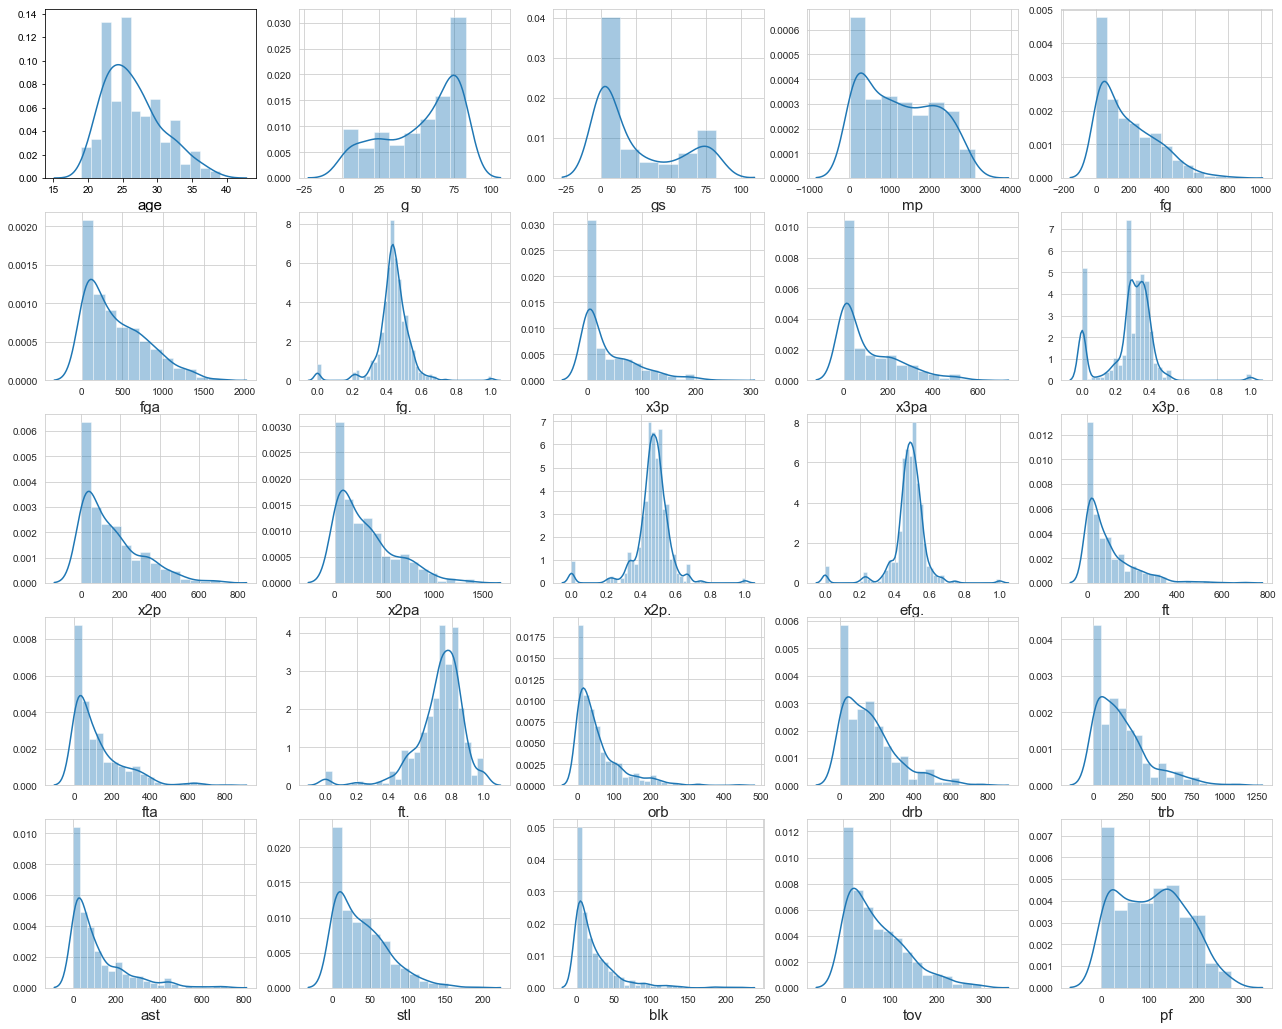

In [57]:
plt.figure(figsize=(22,18))
pt=1

for i in df:
    if pt <=25:
        plt.subplot(5,5,pt)
        sns.set_style('whitegrid')
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=15)
    pt+=1
plt.show()    

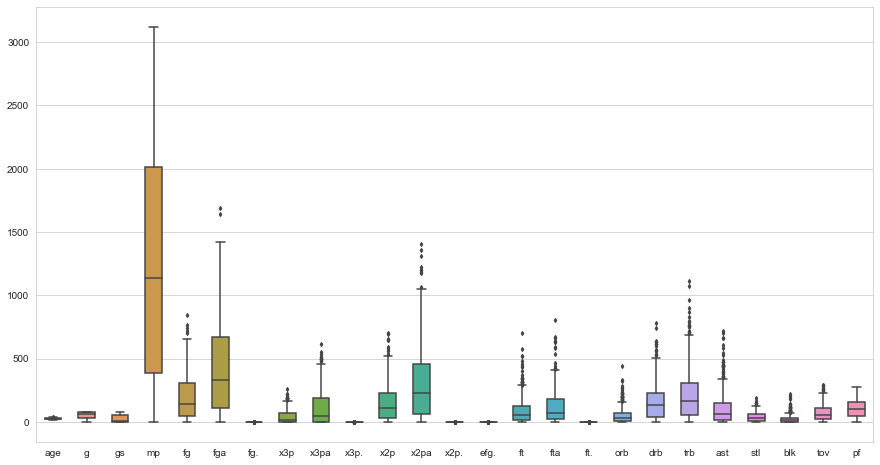

In [59]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df,width=.5,fliersize=3)

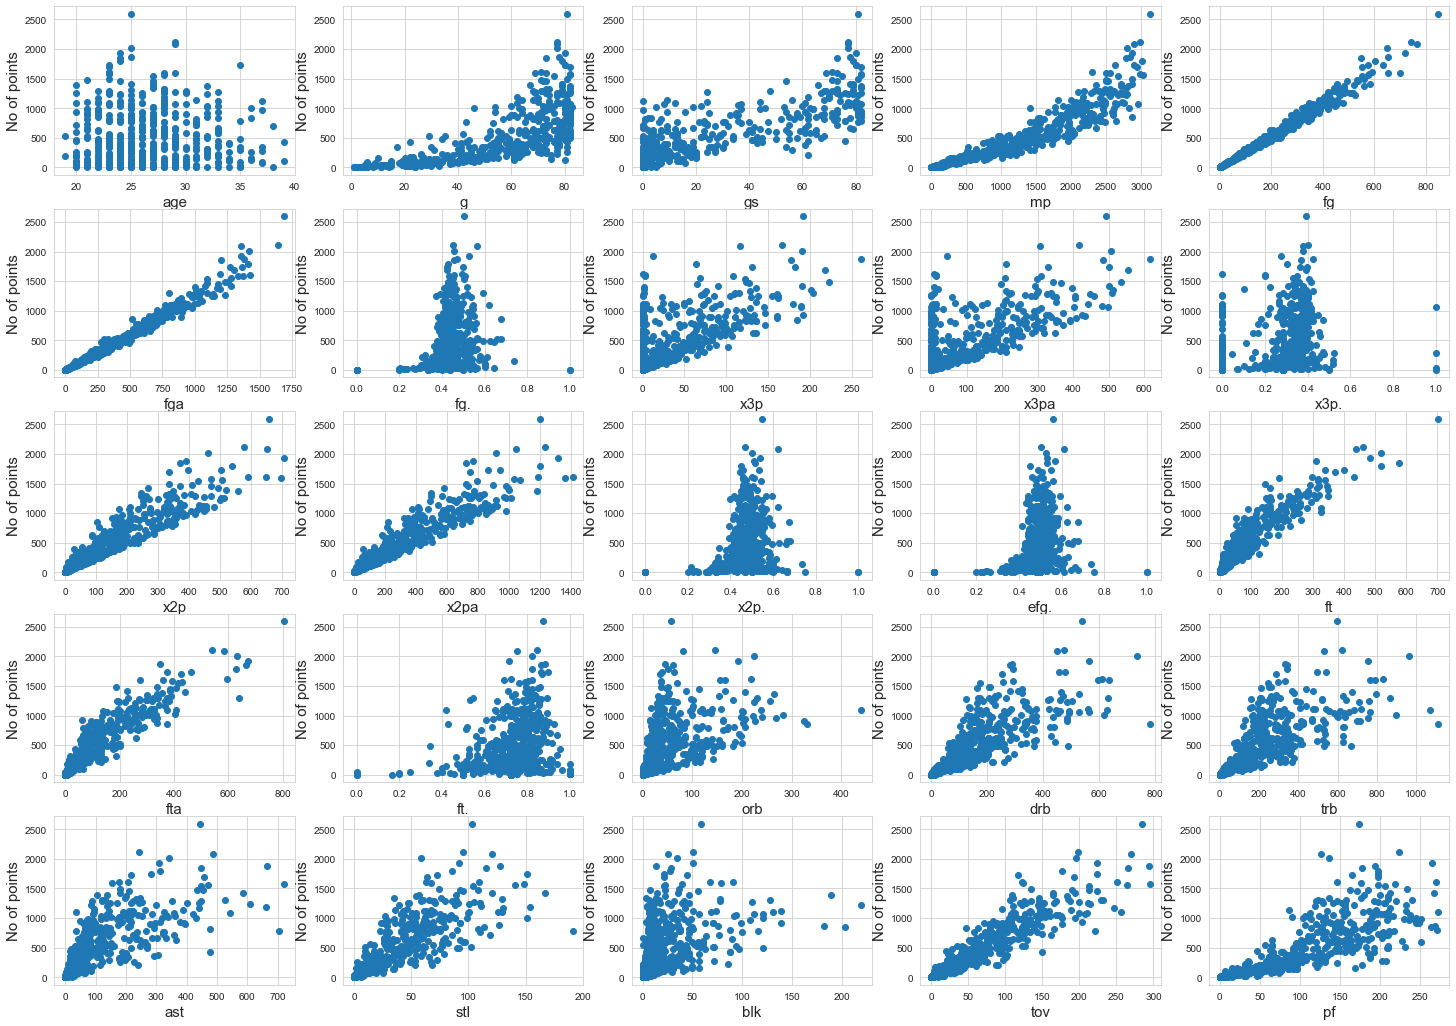

In [77]:
plt.figure(figsize=(25,18))
pt=1

for i in df:
    if pt <=25:
        plt.subplot(5,5,pt)
        #sns.set_style('whitegrid')
        #sns.distplot(df[i])
        plt.scatter(df[i],y)
        plt.xlabel(i,fontsize=15)
        plt.ylabel('No of points',fontsize=15)
    pt+=1
plt.show()    

In [78]:
x_train,x_test,y_train,y_test= train_test_split(df,y,test_size=.25,random_state=0)

In [81]:
print('The shape of training data is: ',x_train.shape,' ',y_train.shape)
print('The shape of testing data is: ',x_test.shape,' ',y_test.shape)

The shape of training data is:  (360, 25)   (360,)
The shape of testing data is:  (121, 25)   (121,)


In [83]:
knn= KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred= knn.predict(x_test)

In [86]:
print('The score of training data is: ',knn.score(x_train,y_train))
print('The score of testing data is: ',knn.score(x_test,y_test))

The score of training data is:  0.9835070168794501
The score of testing data is:  0.9740046872549337


In [87]:
mean_squared_error(y_test,y_pred)

5220.1857851239665

In [88]:
r2_score(y_test,y_pred)

0.9740046872549337

In [ ]:
# Now we will perform grid search to test the performace

In [89]:
param={
    'n_neighbors': range(5,15,1),
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [18,20,25,27,30,32,34]  
}

In [90]:
grid=GridSearchCV(knn,param,verbose=3,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': range(5, 15)},
             verbose=3)

In [91]:
grid.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 6}

In [107]:
knn1= KNeighborsRegressor(algorithm='ball_tree', leaf_size =18, n_neighbors= 6)
knn1.fit(x_train,y_train)
y_pred1= knn1.predict(x_test)

In [118]:
mean_squared_error(y_test,y_pred1)

4124.789583333333

In [117]:
r2_score(y_test,y_pred1)

0.9836414011280282

In [108]:
print('The score of training data is: ',knn1.score(x_train,y_train))
print('The score of testing data is: ',knn1.score(x_test,y_test))

The score of training data is:  0.9814917155427408
The score of testing data is:  0.9836414011280282


In [ ]:
# We can use kfold to identify best k value

In [96]:
kf=KFold(n_splits=12, shuffle=True, random_state=0)
kf.get_n_splits(df)

12

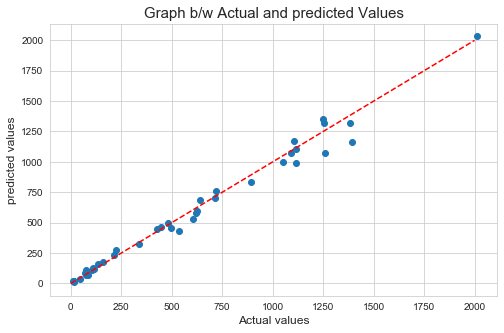

In [115]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred1)
plt.plot([0,2000],[0,2000],'r--')
plt.xlabel('Actual values',fontsize=12)
plt.ylabel('predicted values',fontsize=12)
plt.title('Graph b/w Actual and predicted Values',fontsize=15)
plt.show()